# Video Game Sales 电子游戏销售分析
数据集：[Video Game Sales](https://www.kaggle.com/gregorut/videogamesales)

该数据集包含游戏名称、类型、发行时间、发布者以及在全球各地的销售额数据。

数据量：11列共1.66W数据。

基于这个数据集，可进行以下问题的探索：

- 电子游戏市场分析：受欢迎的游戏、类型、发布平台、发行人等；
- 预测每年电子游戏销售额；
- 可视化应用：如何完整清晰地展示这个销售故事。

In [1]:
import os
import time
import pandas as pd   # data processing, csv file I/O
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# timekeeping
timekeeping = time.time()

# load data
data = pd.read_csv('vgsales.csv')

# description of data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [3]:
# NaN info
data.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

## 数据预处理
观察数据描述可得，属性``Year``和``Publisher``有缺失值，针对这两个属性自身的意义，选择用**最高频率值来填补缺失值**

In [4]:
# Get frequency of Year & Publisher arrtibute
mode_Year = data.mode()['Year'][0]
mode_Publisher = data.mode()['Publisher'][0]

# Fill NA/NaN values using the highest frequency value.
new_data = data.fillna({'Year': mode_Year, 'Publisher': mode_Publisher})
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## 数据集探索
### 受欢迎的游戏、类型、发布平台、发行人等

 - 根据数据集中的``Rank``属性（整体销售排名）可以得出全球最受欢迎的游戏、类型、发布平台以及发行人。

 - 根据其他销售属性（i.e., ``NA_Sales``, ``EU_Sales``, ``JP_Sales``, ``Other_Sales``）也可以得出相应地区的相关信息。

In [5]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


根据表格，可以得出：最受欢迎的游戏是：``Wii Sports``；最受欢迎的类型是：``Sports``；最后欢迎的发行平台是：``Wii``；最受欢迎的发行人是：``Nintendo``。

可以看到，这款游戏自2006年发布以来一直都很受欢迎。

另外，在全球受欢迎程度前五的发行人都是``Nintendo``。

In [6]:
def popular_rank(data, sort_by='NA_Sales'):
    print('Sort by :', sort_by)
    new_data = data.sort_values(by=sort_by, axis=0, )
    return new_data[::-1]

In [7]:
# Sort by NA_Sales/EU_Sales/JP_Sales/Other_Sales
sorted_data = popular_rank(new_data, sort_by='NA_Sales')
sorted_data.head()

Sort by : NA_Sales


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


这里展示了北美的销售情况，可以看到北美最受欢迎的游戏与全球是一致的。前五的排行略有差别，但是发行人还是``Nintendo``。任天堂不愧是游戏界的巨头。

### 预测每年电子游戏销售额
- 利用Logistic预测
- 利用RandomForest预测

将标称属性转换成数值型数据

In [8]:
from sklearn.preprocessing import LabelEncoder

nominal_columns = ['Name', 'Platform', 'Genre', 'Publisher']
numerical_colums = ['Year', 'Global_Sales', 'NA_Sales','EU_Sales','JP_Sales', 'Other_Sales']

encoded_data = pd.DataFrame()
encoder = LabelEncoder()

# encode nominal colums to int
for col in nominal_columns:
    encoded_data[col] = encoder.fit_transform(new_data[col])

for col in numerical_colums:
    encoded_data[col] = new_data[col].values

In [9]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  int64  
 1   Platform      16598 non-null  int64  
 2   Genre         16598 non-null  int64  
 3   Publisher     16598 non-null  int64  
 4   Year          16598 non-null  float64
 5   Global_Sales  16598 non-null  float64
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 1.3 MB


In [10]:
encoded_data.head()

,Name,Platform,Genre,Publisher,Year,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,11007,26,10,359,2006.0,82.74,41.49,29.02,3.77,8.46
1,9327,11,4,359,1985.0,40.24,29.08,3.58,6.81,0.77
2,5573,26,6,359,2008.0,35.82,15.85,12.88,3.79,3.31
3,11009,26,10,359,2009.0,33.00,15.75,11.01,3.28,2.96
4,7346,5,7,359,1996.0,31.37,11.27,8.89,10.22,1.00


这里指演示预测全球电子游戏销售额，将其他地区的销售额（i.e., ``NA_Sales``, ``EU_Sales``, ``JP_Sales``, ``Other_Sales``）最为预测目标的话，也可以预测相应地区的销售额

数据集划分，按照``8:2``将整个数据集分成训练集和测试集

In [11]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(encoded_data, test_size=0.2, random_state=2020)

def data_label_split(data, type_sales='Global_Sales'):
    x = data.drop(type_sales, axis=1)
    y = data[type_sales]
    return x, y

x_train, y_train = data_label_split(train)
x_test, y_test = data_label_split(test)

评价指标：MAE，MSE，RMSE以及MAPE

In [12]:
def mae_value(y_true, y_pred):    
    n = len(y_true)
    mae = sum(np.abs(y_true - y_pred))/n
    return mae

def mse_value(y_true, y_pred):    
    n = len(y_true)
    mse = sum(np.square(y_true - y_pred))/n
    return mse

def rmse_value(y_true, y_pred):
    n = len(y_true)
    mse = sum(np.square(y_true - y_pred))/n
    return mse ** 0.5

def mape_value(y_true, y_pred):    
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n*100
    return mape

#### Logistic预测与评估

In [13]:
from sklearn.linear_model import LinearRegression
log = LinearRegression()
log.fit(x_train , y_train)
y_pred = log.predict(x_test)

# evaluation
print('MAE: ', mae_value(y_test, y_pred))
print('MSE: ', mse_value(y_test, y_pred))
print('RMSE: ', rmse_value(y_test, y_pred))
print('MAPE: ', mape_value(y_test, y_pred))

MAE:  0.0028500275316741667
MSE:  2.6467856619900694e-05
RMSE:  0.005144692082127043
MAPE:  2.751819338017059


#### RandomForest预测与评估

In [14]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=200,min_samples_split=20,random_state=43)
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)

# evaluation
print('MAE: ', mae_value(y_test, y_pred))
print('MSE: ', mse_value(y_test, y_pred))
print('RMSE: ', rmse_value(y_test, y_pred))
print('MAPE: ', mape_value(y_test, y_pred))

MAE:  0.03397944891204797
MSE:  0.05350130785859775
RMSE:  0.2313034972900275
MAPE:  5.321491973678423


### 可视化应用
- 每年的销售额
- 各个平台销售的游戏类型探索
- 词云

### 销售额可视化
分析从1980年到2020年，各个地区和全球的销售额情况

In [15]:
# line chart for sales
def line_chart(data):
    
    x = data.index.values
    
    plt.figure(figsize=(20,10))
    plt.plot(x, data['Global_Sales'], label='Global', c='red')
    plt.plot(x, data['NA_Sales'], label='North America', c='peru')
    plt.plot(x, data['EU_Sales'], label='Europe', c='purple')
    plt.plot(x, data['JP_Sales'], label='Japan', c='blue')
    plt.plot(x, data['Other_Sales'], label='rest of the world', c='yellow')
    
    plt.title('Annual sales per region', fontsize=20)
    plt.xlabel('Year', fontsize=20)
    plt.ylabel('Sales (in millions)', fontsize=20)
    plt.legend(loc='best', fontsize=20)
    plt.show()

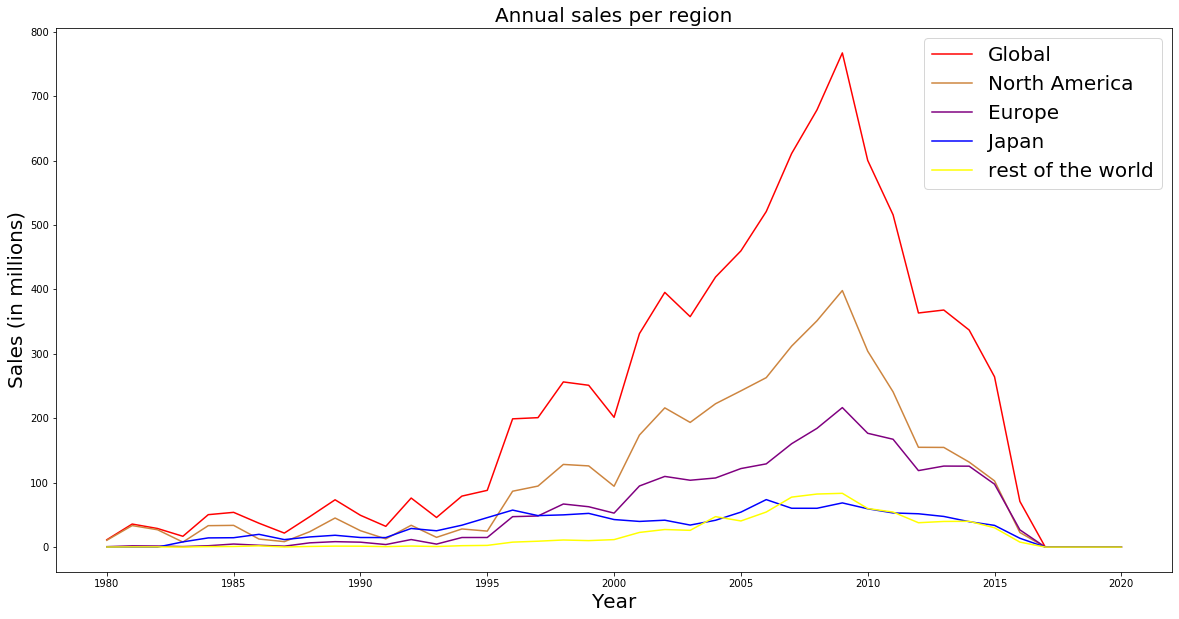

In [16]:
line_chart(new_data.groupby(['Year']).sum())

从1980年到2008年，每一年的游戏销量都在不断地增加，08年之后又开始急剧下降。

#### 平台和游戏类型
探索``Platform`` 和 ``Genre``之间的关系

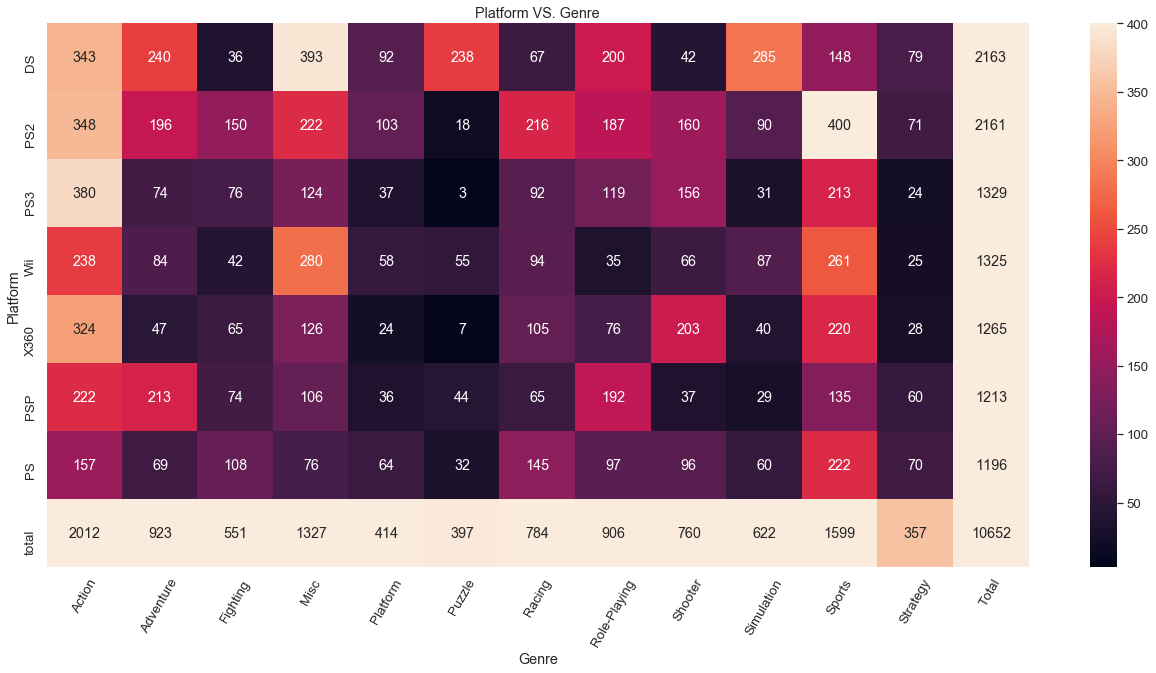

In [17]:
import seaborn as sns

# get data of Platform and Genre
platGenre = pd.crosstab(new_data.Platform, new_data.Genre)

# total number of Genre
platGenre['Total'] = platGenre.sum(axis=1)
popPlatform = platGenre[platGenre['Total'] > 1000].sort_values(by='Total', ascending = False)

neededdata = popPlatform.loc[:,:'Strategy']
maxi = neededdata.values.max()
mini = neededdata.values.min()
popPlatformfinal = popPlatform.append(pd.DataFrame(popPlatform.sum(), columns=['total']).T, ignore_index=False)

sns.set(font_scale=1.2)
plt.figure(figsize=(22,10))
sns.heatmap(popPlatformfinal, vmin = mini, vmax = maxi, annot=True, fmt="d")
plt.xticks(rotation = 60)
plt.ylabel('Platform')
plt.title('Platform VS. Genre')
plt.show()

可以看到在DS和PS2平台上拥有最多的游戏。

另外，对拥有1000多个游戏的平台上，可以进一步看到不同游戏类型的详细信息。

``Action``， ``Adventure`` 和 ``Fighting`` 在各大平台上的数量是最多的几种类型。

然后，再通过分组获得每个区域中每种游戏的销售情况。

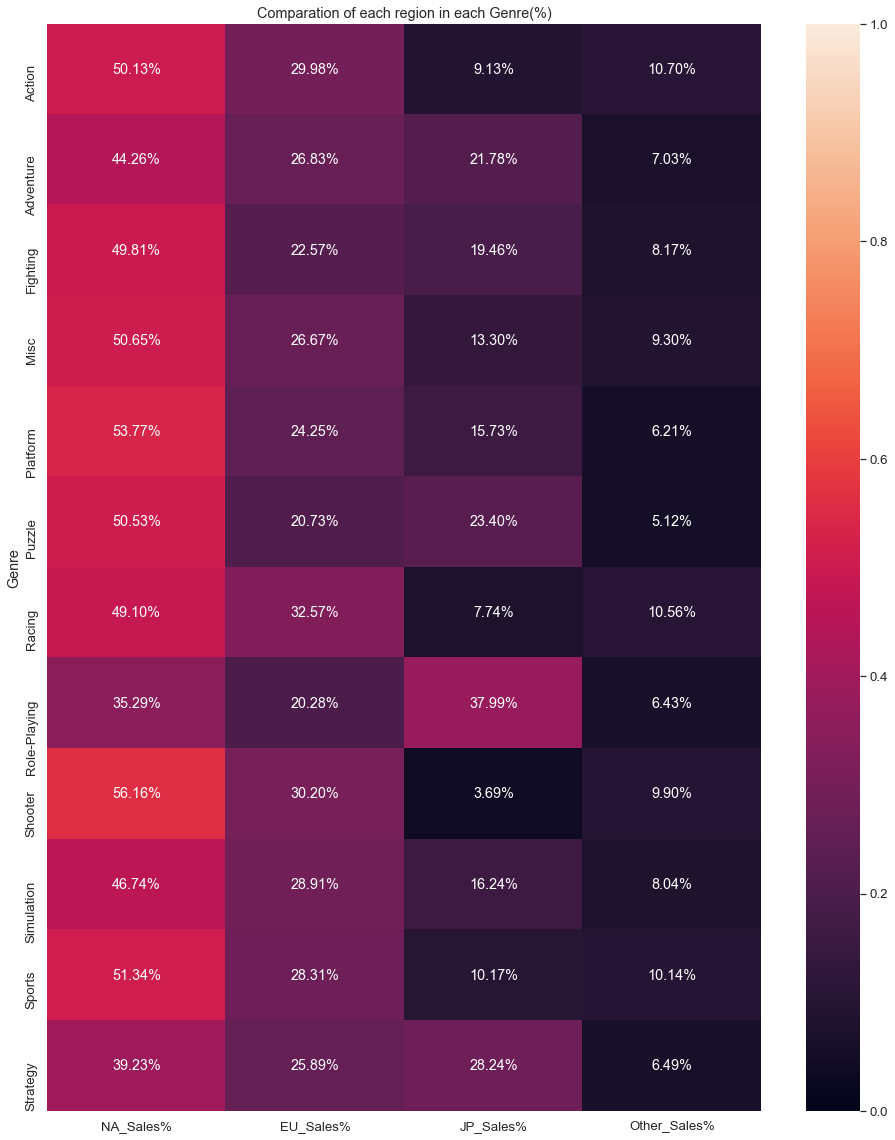

In [18]:
# group by genre
GenreGroup = new_data.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Global_Sales']

# percentage of each region
GenreGroup['NA_Sales%'] = GenreGroup['NA_Sales']/GenreGroup['Global_Sales']
GenreGroup['EU_Sales%'] = GenreGroup['EU_Sales']/GenreGroup['Global_Sales']
GenreGroup['JP_Sales%'] = GenreGroup['JP_Sales']/GenreGroup['Global_Sales']
GenreGroup['Other_Sales%'] = GenreGroup['Other_Sales']/GenreGroup['Global_Sales']

plt.figure(figsize=(16, 20))
sns.set(font_scale=1.2)
sns.heatmap(GenreGroup.loc[:,'NA_Sales%':'Other_Sales%'], vmax =1, vmin=0, annot=True, fmt = '.2%')
plt.title("Comparation of each region in each Genre(%)")
plt.show()

### 词云
利用wordcloud工具来探索不同类型游戏中的通过以哪些关键字来命名

In [19]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def Genre_wordcloud(name='Action'):
    cloud = WordCloud(background_color="white", max_words=100, 
                   stopwords=set(STOPWORDS), max_font_size=60, random_state=2020)
    cloud.generate(new_data.Name[new_data.Genre == name].to_string())
    
    plt.figure(figsize=(20,10))
    plt.imshow(cloud)
    plt.axis("off")
    plt.show()

首先，查看各大平台出品中最受欢迎的游戏类型``Action``中的命名关键字。

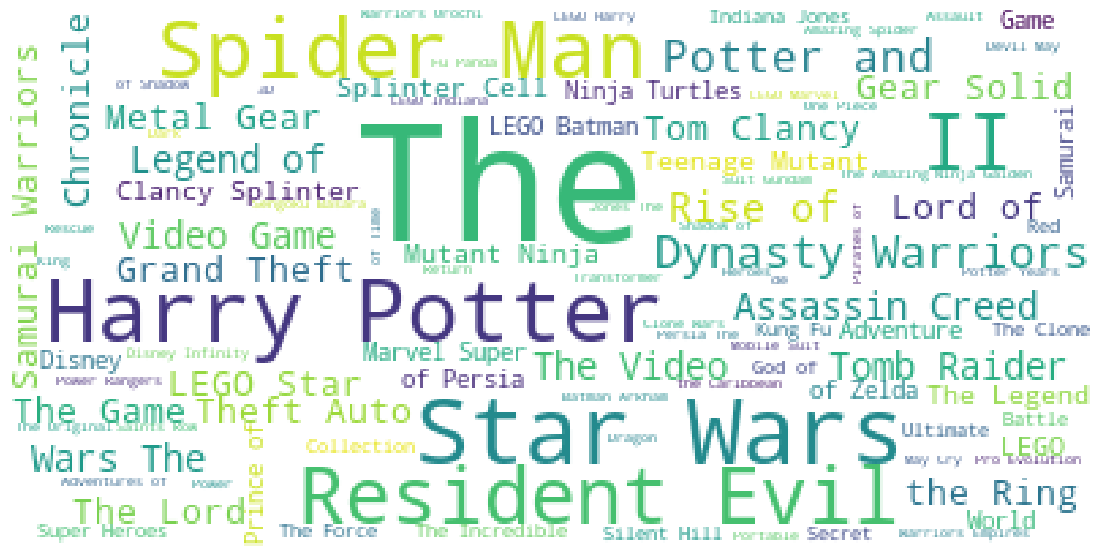

In [20]:
Genre_wordcloud('Action')

从词云中可以看出``Action``类游戏中，最多的是游戏名为：``The``, ``Spider Man``, ``Harry Potter`` 和 ``Star Wars``。

然后，再查看下``Adventure``类中的命名规则

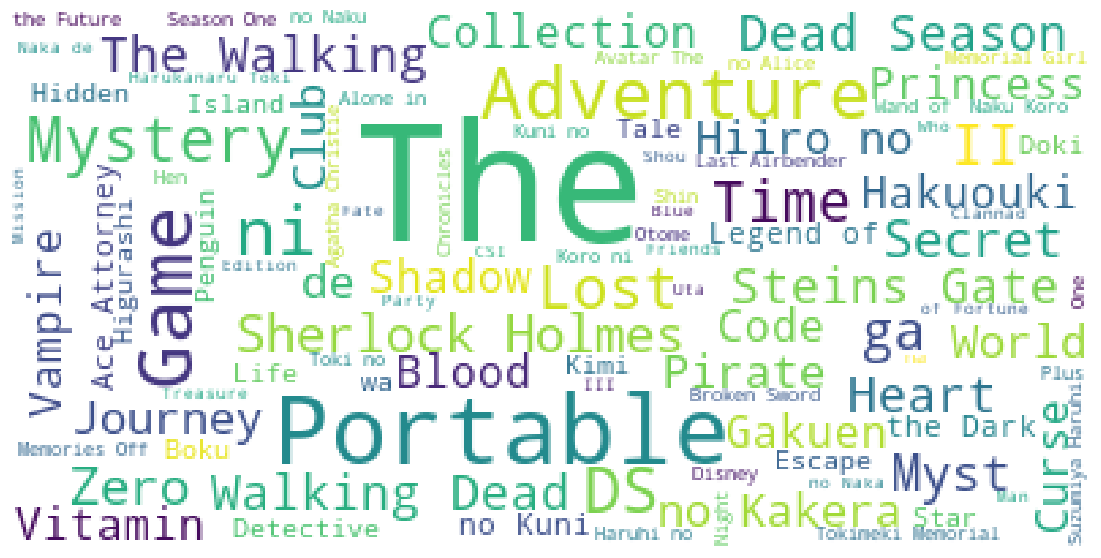

In [21]:
Genre_wordcloud('Adventure')

从词云中可以看出``Adventure``类游戏中，最多的是游戏名为：``The``, ``Adventure``, ``Mystery`` 和 ``Portable``。

In [22]:
m, s = divmod(time.time()-timekeeping, 60)
h, m = divmod(m, 60)
print ('run time: %02d:%02d:%02d' % (h, m, s))

run time: 00:00:13
